In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()
# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [18]:

df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
# 1.List the features and their types
feature_types = df.dtypes
print("Features and their types:")
print(feature_types)

Features and their types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object


In [20]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [21]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [22]:
from sklearn.preprocessing import StandardScaler

# Standardizing the numerical features (sepal length, sepal width, petal length, petal width)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the target column

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=iris.feature_names)

# Add the target column back
scaled_df['species'] = df['species']

# Display the scaled data
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


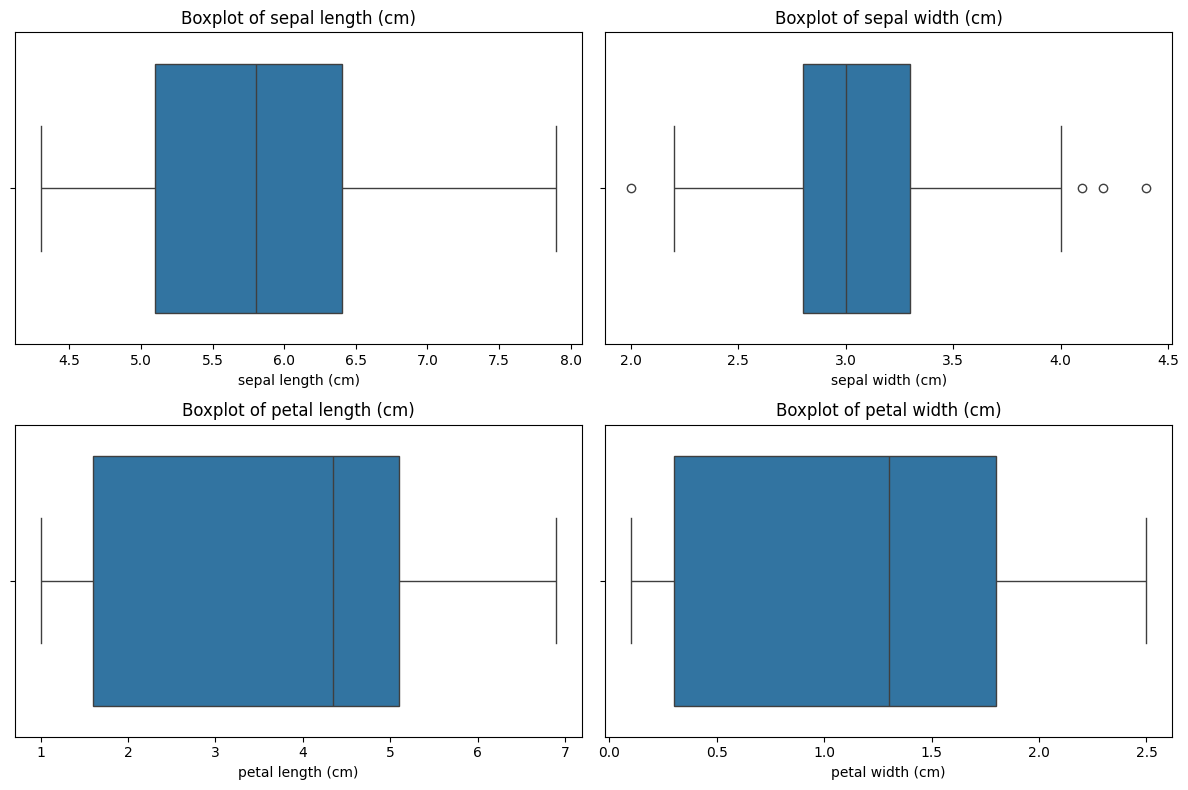

In [23]:
# Create boxplots for each feature to identify outliers
plt.figure(figsize=(12, 8))
features = iris.feature_names

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


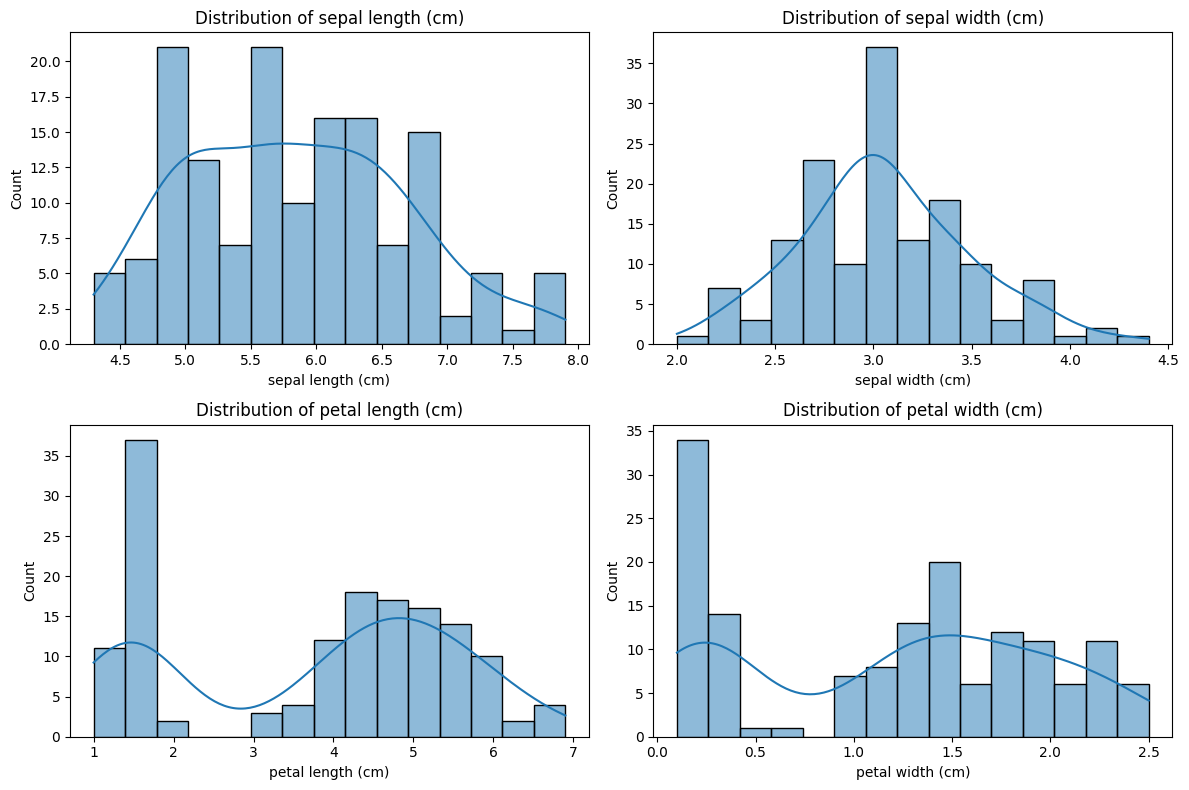

In [24]:
# Create histograms for each numerical feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=15)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


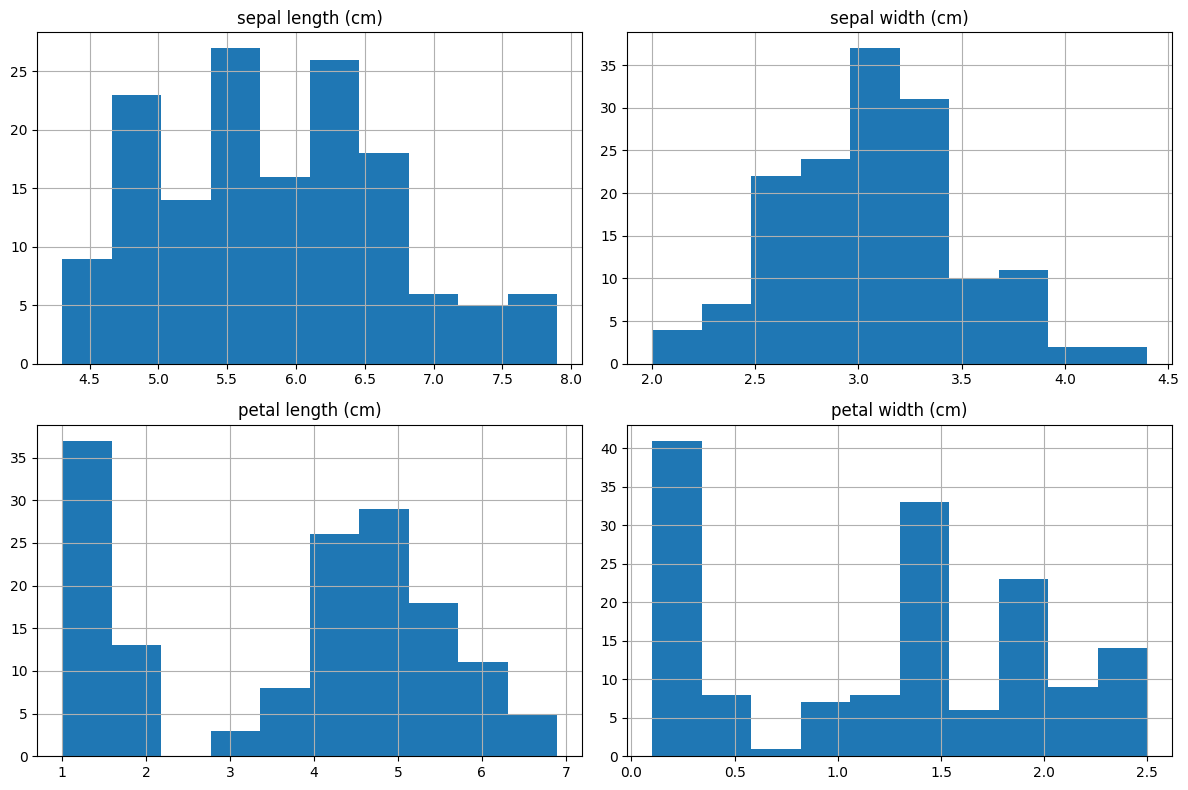

In [25]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

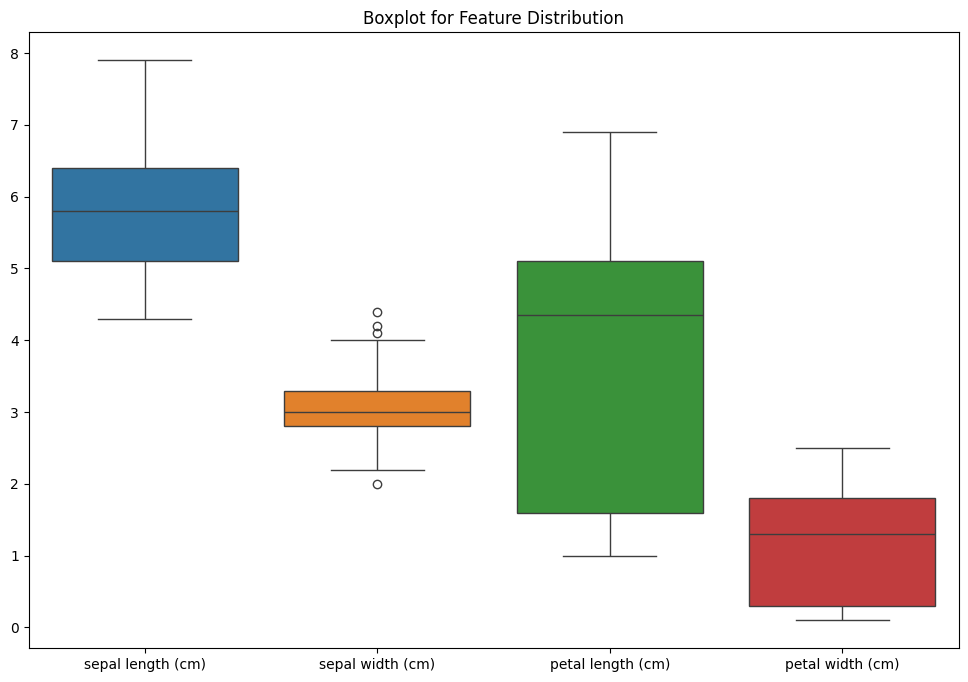

In [26]:
# 3.Boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns='species'))
plt.title('Boxplot for Feature Distribution')
plt.show()
